<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Price Prediction and Risk Analysis

## 1. Install Necessary Libraries


In [91]:
!pip install yfinance

In [102]:
!pip install pandas numpy matplotlib statsmodels

## 2: Import Libraries and Load Data

In [ ]:
# importing libraries
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

#For modelling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [123]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [124]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3789 entries, 2014-09-17 to 2025-01-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3789 non-null   float64
 1   (High, BTC-USD)    3789 non-null   float64
 2   (Low, BTC-USD)     3789 non-null   float64
 3   (Open, BTC-USD)    3789 non-null   float64
 4   (Volume, BTC-USD)  3789 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.6 KB


In [126]:
# Rename columns to remove the repetition of 'BTC-USD'
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [127]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494
2025-01-29,103703.210938,104750.804688,101283.820312,101317.523438,47432049818
2025-01-30,105152.695312,105562.601562,103460.500000,103718.054688,52646100992


## Data Cleaning

In [128]:
#convert the index column to datetime
df.index = pd.to_datetime(df.index)

In [129]:
# Set 'Date' as the index and sort it
df.index = pd.to_datetime(df.index)

# Extract the 'Close' price for ARIMA/SARIMA modeling
series = df['Close']

In [130]:
# renamnimg the close column to close_price
df = df.rename(columns={'Close': 'close_price'})

## 3: Visualizing the Data

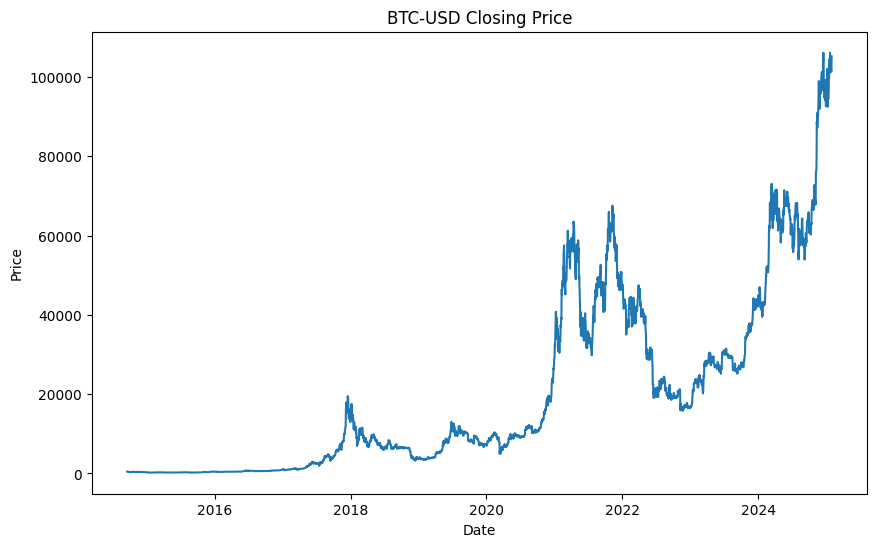

In [112]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## 4: Check for Stationarity

Augmented Dickey-Fuller test to check for stationarity. A p-value below 0.05 suggests the data is stationary.

In [107]:
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.7078322432424775
p-value: 0.9899928862633942


In [131]:
# Interpretation
adf_statistics = result[0]
p_value = result[1]

if p_value < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)


## 5: Make the Series Stationary

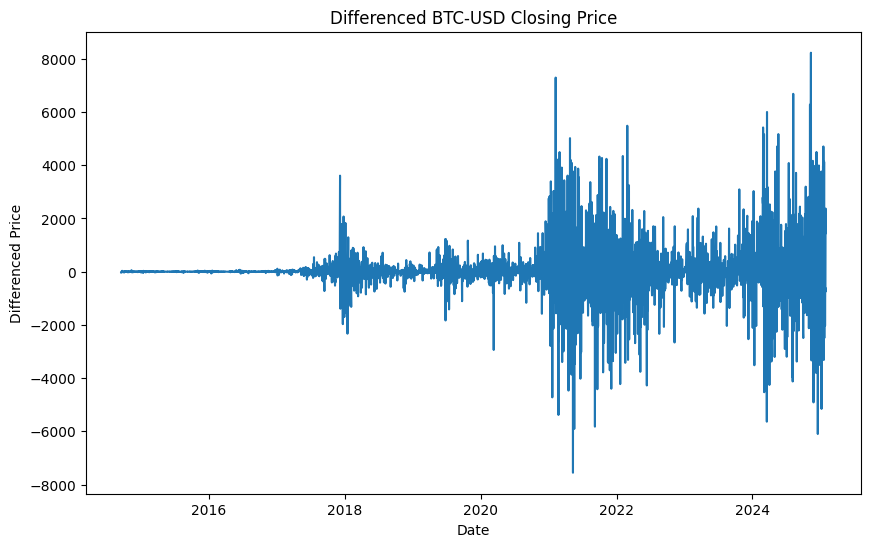

In [132]:
# Differencing the series
diff_series = series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(diff_series)
plt.title('Differenced BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

## 6: Identify ARIMA Parameters (p, d, q)

- Plot ACF and PACF to find the values of p and q.

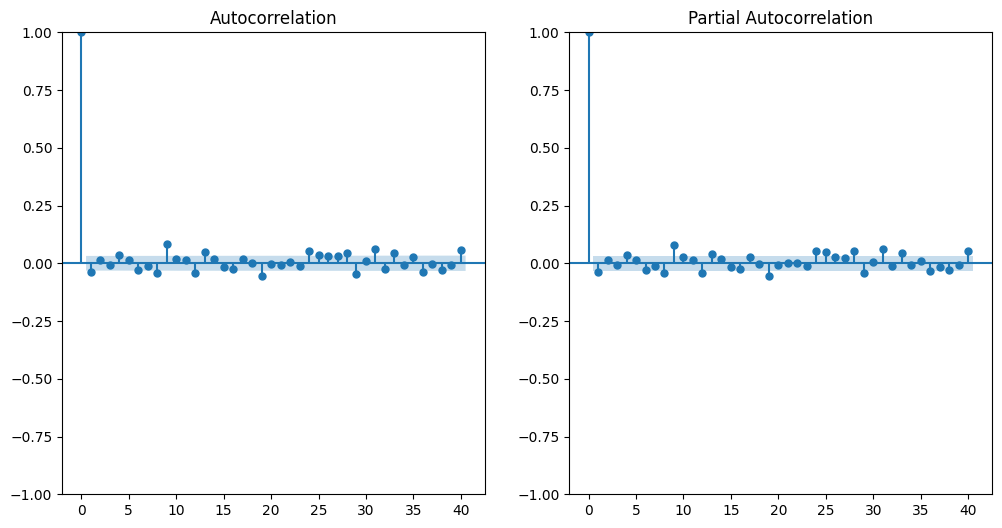

In [133]:
# ACF and PACF plots for ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(diff_series, lags=40, ax=plt.gca())
plt.show()

## Modelling

### Train-Test Split

In [134]:
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['close_price'])
testing_data = list(df[to_row:]['close_price'])

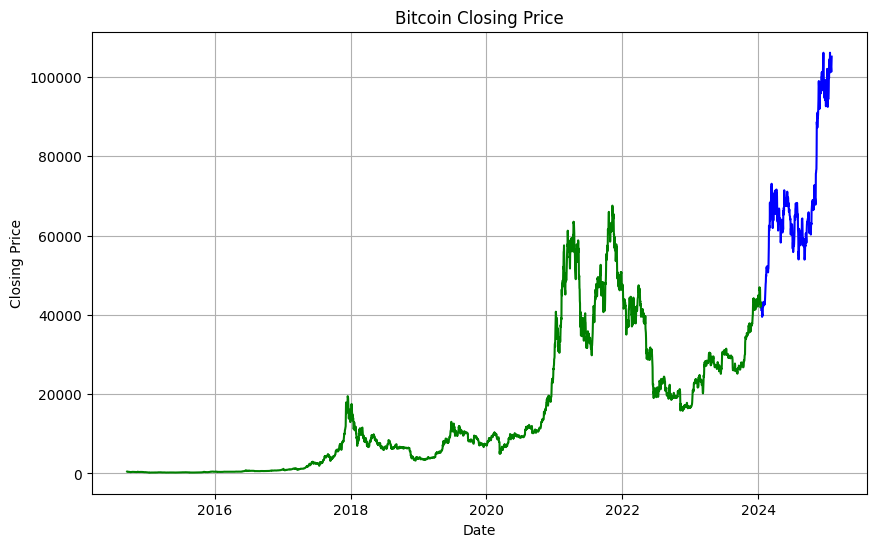

In [135]:
#split data into train and test set
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Price')
plt.plot(df[0:to_row]['close_price'], 'green',  label='Training Data')
plt.plot(df[to_row:]['close_price'], 'blue', label='Testing Data')

### ARIMA Model

In [160]:
# Initialize an empty list to store predictions
model_predictions = []

# Length of testing data
n_test_observations = len(testing_data)

In [161]:
# Rolling forecast loop
for i in range(n_test_observations):
    # Train the ARIMA model with the current training data
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()

    # Forecast the next value
    output = model_fit.forecast(steps=1)
    yhat = output[0]  # The predicted value for the current step
    model_predictions.append(yhat)

    # Append the actual test value to the training data (for the rolling forecast)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [162]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3792
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -31405.450
Date:                Thu, 30 Jan 2025   AIC                          62820.900
Time:                        12:14:49   BIC                          62852.102
Sample:                             0   HQIC                         62831.990
                               - 3792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0350      0.009     -4.026      0.000      -0.052      -0.018
ar.L2          0.0152      0.009      1.728      0.084      -0.002       0.033
ar.L3         -0.0030      0.009     -0.326      0.7

## 8: Forecasting with ARIMA

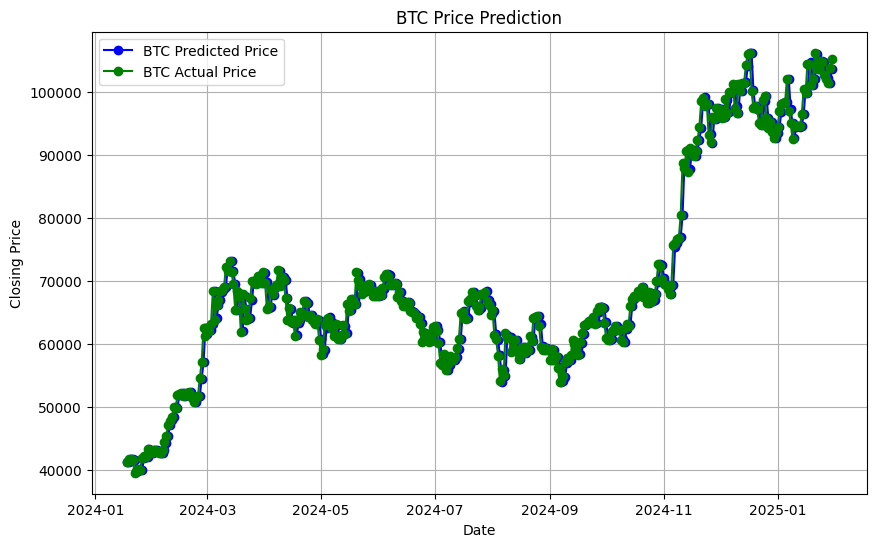

In [163]:
# Plot the forecasted vs actual values
plt.figure(figsize=(10, 6))
plt.grid(True)

# Plot predictions (model_predictions) and actual values (testing_data)
plt.plot(data_range, model_predictions, color='blue', marker='o', linestyle='-', label='BTC Predicted Price')
plt.plot(data_range, testing_data, color='green', marker='o', linestyle='-', label='BTC Actual Price')

plt.title('BTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### SARIMA Model

To fit a SARIMA model, we need to specify both the non-seasonal order (p, d, q) and the seasonal order (P, D, Q, m), where:

- p = number of autoregressive terms
- d = number of differences required to make the series stationary
- q = number of moving average terms
- P = seasonal autoregressive order
- D = seasonal differencing order
- Q = seasonal moving average order
- m = the number of periods in each season (e.g., 12 for monthly data with yearly seasonality)

In [171]:
# Initialize an empty list to store predictions
sarima_predictions = []

# Length of testing data
n_test_observations = len(testing_data)

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Import SARIMAX

In [ ]:
# Rolling forecast loop for SARIMA
for i in range(n_test_observations):
    # Train the SARIMA model with the current training data
    model = SARIMAX(training_data, order=(4, 1, 0), seasonal_order=(1, 1, 1, 7))  # Adjust seasonal_order as needed
    model_fit = model.fit()

    # Forecast the next value
    output = model_fit.forecast(steps=1)
    yhat = output[0]  # The predicted value for the current step
    sarima_predictions.append(yhat)

    # Append the actual test value to the training data (for the rolling forecast)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)


In [ ]:
# Print the model summary
print(model_fit.summary())

### Forecast Future Values

NameError: name 'test_data' is not defined

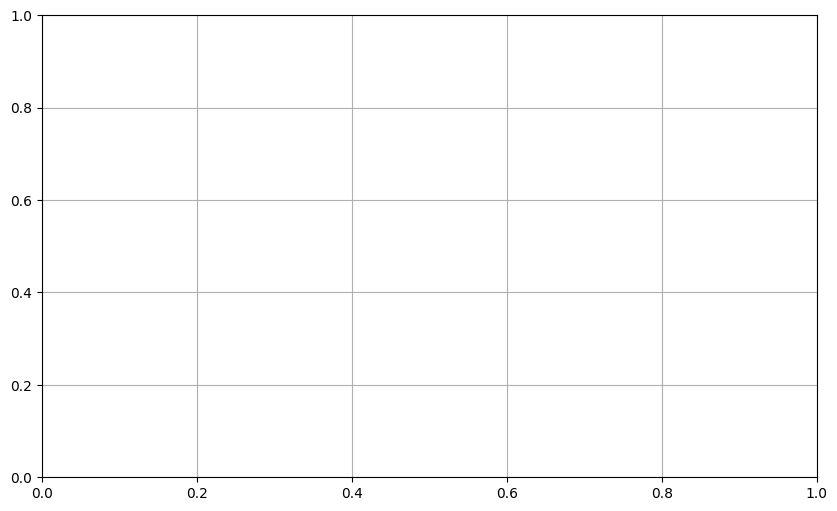

In [170]:
# Plot the forecasted vs actual values
plt.figure(figsize=(10, 6))
plt.grid(True)

# Set the date range for the testing data
data_range = testing_data.index

# Plot predicted values from SARIMA model and actual values
plt.plot(data_range, sarima_predictions, color='blue', marker='o', linestyle='-', label='BTC Predicted Price')
plt.plot(data_range, testing_data, color='green', marker='o', linestyle='-', label='BTC Actual Price')

# Add titles and labels
plt.title('BTC Price Prediction using SARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Evaluate the Model Performance

In [164]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
mae = mean_absolute_error(testing_data, model_predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Root Mean Squared Error (RMSE): 1915.3226825995348
Mean Absolute Error (MAE): 1374.3453584164213
